In [1]:
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib.pyplot as plt

infile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/OurCD8TIL_ranked/compare_BSseq_EMseq_result/cross_correlation_divideby_mappedreads/cross_corr_divide_by_avilable_fragmens/raw_score_divby_testedfrag_rename/corr/divbyctfrag_row_combined_allBS.txt'
outfile=infile+"_zscore"
indf=pd.read_csv(infile,sep='\t')
indf.head()

,Mixture,Naive CD4 T,Naive CD8,Naive B,NK,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,...,Tregs,CD4 TEM,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B,CD8TIL,Response,Toxicity
0,tot-YUCLUE_20-3998-cfDNA,0.080211,0.076440,0.080704,0.120011,0.139718,0.127254,0.117747,0.104949,0.156625,...,0.098908,0.110806,0.126301,0.364866,0.095536,0.286877,0.075875,0.114821,NDB,NaN
1,tot-YUMARS_15-3443-cfDNA,0.087460,0.085309,0.086667,0.148495,0.182818,0.149817,0.134918,0.107610,0.156867,...,0.094092,0.110973,0.127492,0.355343,0.095317,0.281729,0.074866,0.131806,DCB,NaN
2,tot-YUMICRO_20-4006-cfDNA,0.105366,0.108974,0.102689,0.107147,0.125235,0.149912,0.164340,0.148150,0.138021,...,0.099994,0.135910,0.107257,0.234098,0.123518,0.165975,0.088051,0.103787,NDB,NaN
3,tot-YUMOTE_17-3755-cfDNA,0.093555,0.093465,0.096344,0.103077,0.164439,0.157373,0.162598,0.120904,0.143685,...,0.096139,0.117725,0.106207,0.294016,0.108213,0.250253,0.088282,0.114117,NDB,NaN
4,tot-YUPRAF_19-3925-cfDNA,0.094513,0.094132,0.090885,0.128325,0.188432,0.144568,0.138062,0.117094,0.152535,...,0.105292,0.125465,0.146364,0.251690,0.121105,0.207566,0.076611,0.163490,DCB,1.0


In [2]:
indf.columns

Index(['Mixture', 'Naive CD4 T', 'Naive CD8', 'Naive B', 'NK', 'Mono',
       'Mac (M0)', 'Mac (M1)', 'Mac (M2)', 'iDC', 'mDC', 'PMN', 'CD8 TCM',
       'CD8 TEM', 'Eosinophil', 'Tregs', 'CD4 TEM', 'CD8 TEMRA',
       'Megakaryocyte', 'CD4 TCM', 'Erythrocyte', 'Memory B', 'CD8TIL',
       'Response', 'Toxicity'],
      dtype='object')

In [3]:
zscoredDF=indf.copy()

In [4]:
columnsfornormalization=['Naive CD4 T', 'Naive CD8', 'Naive B', 'NK', 'Mono','Mac (M0)', 'Mac (M1)', 'Mac (M2)', 'iDC', 'mDC', 'PMN', 'CD8 TCM','CD8 TEM', 'Eosinophil', 'Tregs', 'CD4 TEM', 'CD8 TEMRA','Megakaryocyte', 'CD4 TCM', 'Erythrocyte', 'Memory B', 'CD8TIL','CD4','CD8','Bcell']

In [5]:
for col in columnsfornormalization:
    if col in indf.columns.tolist():
        zscoredDF[col] = (zscoredDF[col] - zscoredDF[col].mean())/zscoredDF[col].std(ddof=0)

In [6]:
zscoredDF.head()

,Mixture,Naive CD4 T,Naive CD8,Naive B,NK,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,...,Tregs,CD4 TEM,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B,CD8TIL,Response,Toxicity
0,tot-YUCLUE_20-3998-cfDNA,-0.386162,-0.242050,-0.269723,0.140179,-0.593829,-0.520838,-0.402323,0.014269,0.735687,...,0.741844,0.379284,1.062354,0.794395,0.122884,0.664482,0.383496,-0.335980,NDB,NaN
1,tot-YUMARS_15-3443-cfDNA,0.134730,0.471548,0.255134,1.753762,1.188847,0.758667,0.489676,0.172414,0.751309,...,0.383312,0.388042,1.136692,0.652019,0.110656,0.578374,0.293035,0.069687,DCB,NaN
2,tot-YUMICRO_20-4006-cfDNA,1.421279,2.375837,1.665396,-0.588551,-1.192877,0.764057,2.018103,2.581170,-0.465003,...,0.822717,1.695980,-0.126523,-1.160714,1.684963,-1.357871,1.475661,-0.599535,NDB,NaN
3,tot-YUMOTE_17-3755-cfDNA,0.572634,1.127846,1.106879,-0.819151,0.428665,1.187161,1.927597,0.962290,-0.099446,...,0.535736,0.742210,-0.192017,-0.264881,0.830604,0.051864,1.496397,-0.352802,NDB,NaN
4,tot-YUPRAF_19-3925-cfDNA,0.641461,1.181515,0.626382,0.611114,1.421019,0.460978,0.652972,0.735925,0.471707,...,1.217157,1.148180,2.314789,-0.897694,1.550268,-0.662163,0.449571,0.826431,DCB,1.0


In [7]:
zscoredDF.to_csv(outfile+".txt",sep='\t',index=False,na_rep='NA')

In [8]:
zscoredDF.loc[zscoredDF['Toxicity']>2,'irAE']='Severe irAE'
zscoredDF.loc[zscoredDF['Toxicity']<=2,'irAE']='No severe irAE'

NDB v.s. DCB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.854e-02 U_stat=2.100e+01


(<matplotlib.axes._subplots.AxesSubplot at 0x7fd212726b70>,
 [<statannot.StatResult.StatResult at 0x7fd21302c898>])

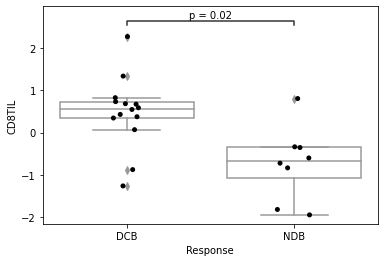

In [9]:
ax=sns.boxplot(x='Response', y='CD8TIL', data=zscoredDF,color='white',order=['DCB','NDB'])
ax=sns.stripplot(x='Response', y='CD8TIL', data=zscoredDF,color='black',order=['DCB','NDB'])
add_stat_annotation(ax,x='Response', y='CD8TIL', data=zscoredDF,box_pairs=[('DCB','NDB')],test='Mann-Whitney', text_format='simple', loc='inside')

NDB v.s. DCB: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.854e-02 U_stat=2.100e+01


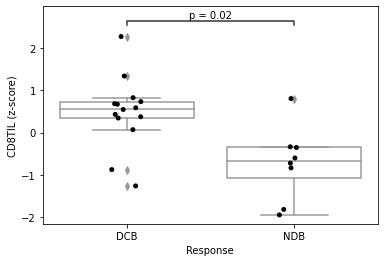

In [10]:
y='CD8TIL'
x='Response'
order=['DCB','NDB']
ax=sns.boxplot(x=x, y=y, data=zscoredDF,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=zscoredDF,order=order,color='black')
ax.set_ylabel(y+" (z-score)")
add_stat_annotation(ax,x=x, y=y, data=zscoredDF,box_pairs=[('DCB','NDB')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outfile + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


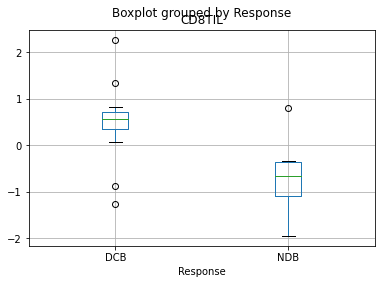

In [11]:
zscoredDF.boxplot(column='CD8TIL', by='Response')

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.165e-01 U_stat=1.800e+01


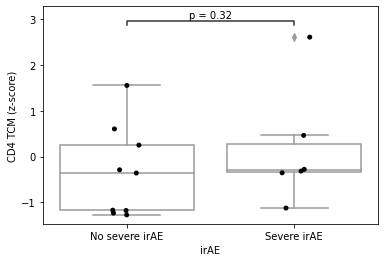

In [12]:

y='CD4 TCM'
x='irAE'
order=['No severe irAE','Severe irAE']
ax=sns.boxplot(x=x, y=y, data=zscoredDF,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=zscoredDF,order=order,color='black')
ax.set_ylabel(y+" (z-score)")
add_stat_annotation(ax,x=x, y=y, data=zscoredDF,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outfile + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


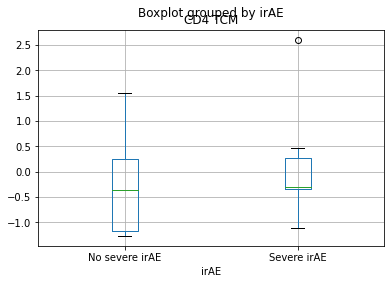

In [13]:
zscoredDF.boxplot(column='CD4 TCM', by='irAE')

No severe irAE v.s. Severe irAE: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.629e-01 U_stat=1.700e+01


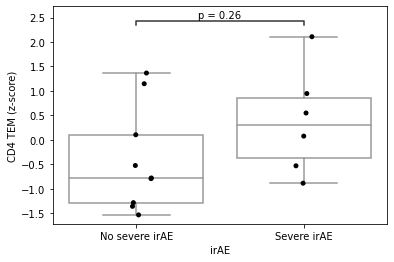

In [14]:
y='CD4 TEM'
x='irAE'
order=['No severe irAE','Severe irAE']
ax=sns.boxplot(x=x, y=y, data=zscoredDF,order=order,color='white')
ax=sns.stripplot(x=x, y=y, data=zscoredDF,order=order,color='black')
ax.set_ylabel(y+" (z-score)")
add_stat_annotation(ax,x=x, y=y, data=zscoredDF,box_pairs=[('No severe irAE','Severe irAE')],test='Mann-Whitney', text_format='simple', loc='inside')
plt.savefig(outfile + '_'+x+'_'+y+'.pdf', bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


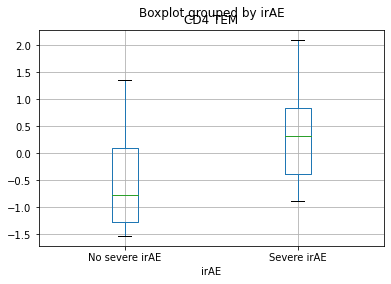

In [15]:
zscoredDF.boxplot(column='CD4 TEM', by='irAE')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


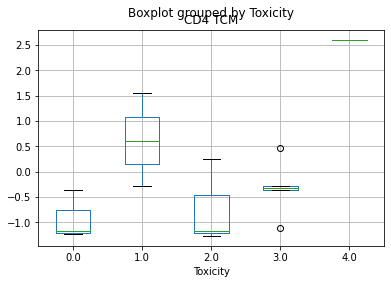

In [16]:
zscoredDF.boxplot(column='CD4 TCM', by='Toxicity')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


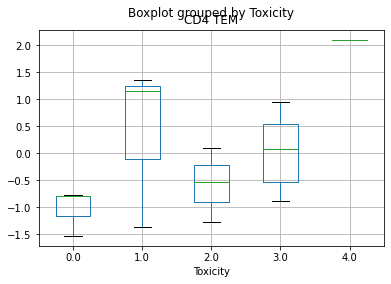

In [17]:
zscoredDF.boxplot(column='CD4 TEM', by='Toxicity')

In [18]:
zscoredDF.to_csv(outfile+"_fullannotattion.txt",sep='\t',index=False,na_rep='NA')